# **Malware Detection**

**This Malware classification model detects whether there is any when the data sets are given**

In [ ]:
import pandas as pd
#This dataset is found from github. The link is given in solution explanation pdf
#loading the dataset
df=pd.read_csv('/content/MalwareData.csv',sep='|')
df.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,6135,4096,372736,4194304.0,4096,512,0,0,0,0,1,0,1036288,1024,485887,16,1024,1048576,4096,1048576,4096,0,16,8,5.766807,3.607430,7.221051,59712.0,1024,325120,126875.875,896,551848,0,0,0,0,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,81778,4096,143360,771751936.0,4096,512,5,1,0,0,5,1,159744,1024,188943,2,33088,1048576,4096,1048576,4096,0,16,4,4.839688,2.373525,6.566909,35584.0,2048,130560,37322.000,1840,130296,7,181,0,0,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,350896,4096,811008,771751936.0,4096,512,5,1,0,0,5,1,1150976,1024,1159817,2,32832,1048576,4096,1048576,4096,0,16,4,6.409558,4.885191,7.600957,273408.0,21504,517120,284498.000,21456,516760,14,235,21,1,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,451258,4096,798720,771751936.0,4096,512,5,1,0,0,5,1,962560,1024,867570,2,33088,1048576,4096,1048576,4096,0,16,4,6.641731,5.642565,7.594929,207872.0,15360,585728,238502.000,15208,585488,15,360,6,1,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,217381,4096,536576,771751936.0,4096,512,5,1,0,0,5,1,552960,1024,579287,2,33088,1048576,4096,1048576,4096,0,16,4,6.252684,4.182282,7.608305,128128.0,2560,294912,135350.000,2320,294816,10,194,4,1,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138047 entries, 0 to 138046
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Name                         138047 non-null  object 
 1   md5                          138047 non-null  object 
 2   Machine                      138047 non-null  int64  
 3   SizeOfOptionalHeader         138047 non-null  int64  
 4   Characteristics              138047 non-null  int64  
 5   MajorLinkerVersion           138047 non-null  int64  
 6   MinorLinkerVersion           138047 non-null  int64  
 7   SizeOfCode                   138047 non-null  int64  
 8   SizeOfInitializedData        138047 non-null  int64  
 9   SizeOfUninitializedData      138047 non-null  int64  
 10  AddressOfEntryPoint          138047 non-null  int64  
 11  BaseOfCode                   138047 non-null  int64  
 12  BaseOfData                   138047 non-null  int64  
 13 

In [ ]:
df.shape #This is a really large dataset

(138047, 57)

In [ ]:
df=df.drop(axis=1,columns=['Name','md5']) #As these features doesnt have any effect we are removing them. They are objects

In [ ]:
df.corr()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
Machine,1.000000,0.997541,0.114560,0.045254,-0.112991,0.013378,-0.001511,-0.002225,0.007993,-0.003476,-0.036518,0.014930,-0.001472,-0.038112,0.002570,0.000361,0.059848,0.058963,0.431452,-0.000333,0.008352,-0.013336,-0.108083,0.299575,-0.366343,-0.321671,0.006598,-0.101637,-0.001386,-0.001463,-0.001946,0.022223,-0.198696,-0.073418,-0.360762,0.001392,0.045414,0.000741,0.002762,0.043773,0.002454,0.081244,0.115497,0.082367,0.063642,0.058074,-0.094055,0.164394,-0.187737,-0.002039,-0.000982,-0.003153,-0.006442,0.214003,0.548835
SizeOfOptionalHeader,0.997541,1.000000,0.114889,0.044815,-0.112439,0.013337,-0.001514,-0.002219,0.007978,-0.003462,-0.036436,0.014894,-0.001470,-0.037939,0.002561,0.000356,0.059691,0.058807,0.430080,-0.000334,0.008307,-0.013253,-0.107917,0.298867,-0.365855,-0.320468,0.006730,-0.101371,-0.001384,-0.001460,-0.001943,0.022337,-0.198774,-0.073503,-0.359880,0.001382,0.045293,0.000733,0.002745,0.043654,0.002439,0.081089,0.114992,0.082137,0.063465,0.057897,-0.093526,0.164380,-0.187120,-0.002036,-0.000980,-0.003149,-0.006432,0.213150,0.547498
Characteristics,0.114560,0.114889,1.000000,-0.395516,0.393974,0.013140,-0.002622,0.003177,0.046334,0.013801,0.091419,-0.002897,-0.002306,0.024523,-0.005477,-0.001800,0.018413,0.017477,-0.139824,0.000517,0.017634,0.021384,0.079277,0.126021,-0.549302,-0.160081,0.140651,-0.053155,0.000970,0.001886,0.002183,0.162580,-0.517653,-0.359937,-0.273417,0.008910,0.015136,0.010546,0.009057,0.017292,0.005601,0.251199,0.007799,0.012964,0.030016,0.083999,-0.130114,-0.074249,-0.150425,-0.003146,-0.001394,-0.003386,-0.008485,0.083720,0.221956
MajorLinkerVersion,0.045254,0.044815,-0.395516,1.000000,-0.360427,0.054622,0.017235,0.214167,-0.019868,0.057717,-0.031548,0.000501,0.000445,-0.012471,0.002135,-0.003121,0.008089,0.008048,0.347705,-0.001503,-0.001501,-0.014026,0.006982,0.008789,0.197553,-0.122042,-0.073304,0.013998,-0.002448,-0.002725,-0.003617,-0.141638,0.329899,0.327529,0.130718,-0.004348,0.006640,-0.005041,-0.004652,0.005003,-0.003098,-0.158834,-0.001076,0.024693,-0.003613,-0.016605,0.109586,0.105925,0.083634,-0.005227,-0.003717,-0.004542,-0.004779,0.051427,0.017320
MinorLinkerVersion,-0.112991,-0.112439,0.393974,-0.360427,1.000000,0.018556,0.000655,0.084334,0.025913,0.030302,0.037720,-0.001735,-0.001660,-0.026038,0.002040,0.043125,-0.013462,-0.014049,-0.383092,0.005000,0.002637,0.006245,0.026364,-0.082979,-0.123980,0.327050,0.072932,0.012201,0.005829,0.006564,0.006479,0.267261,-0.374566,-0.349413,-0.083971,-0.003534,-0.015157,-0.001943,0.000932,-0.013214,-0.000069,0.190151,0.017581,-0.026464,-0.014936,0.012709,-0.045304,-0.119315,0.000601,-0.001781,-0.000666,-0.001538,-0.005353,-0.284006,-0.146652
SizeOfCode,0.013378,0.013337,0.013140,0.054622,0.018556,1.000000,0.461045,0.000723,0.021391,0.842456,0.039700,0.000199,-0.000178,0.009515,0.000186,-0.000019,0.008279,0.008258,0.006918,-0.000141,0.027979,0.003180,-0.007451,0.001710,-0.026247,-0.006458,0.002333,0.004339,-0.000100,-0.000093,0.000285,0.010079,0.000655,-0.008867,-0.001053,0.003343,-0.000695,0.003688

In [ ]:
#This is to find skewed data
num_feats=df.dtypes.index
skew_feats=df[num_feats].skew().sort_values(ascending=False)
skewness=pd.DataFrame({'Skew':skew_feats})
skewness

,Skew
ResourcesMinSize,371.539499
MajorOperatingSystemVersion,371.493184
BaseOfCode,358.514246
SectionsMeanVirtualsize,302.168187
SectionMaxVirtualsize,282.350440
SizeOfCode,275.682723
SizeOfHeapCommit,262.717090
MinorSubsystemVersion,262.700091
SizeOfUninitializedData,262.416673
LoaderFlags,259.312633


In [ ]:
#we make legitimate column as dependent variable and we drop it from the dataset
y=df.iloc[:,-1].values
df=df.drop(axis=1,columns='legitimate')
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
x_new=df.iloc[:,:]
y_new=y

In [ ]:
#this step is transformation of skewed data
import numpy as np
df=np.sqrt(df)


In [ ]:
#importing ensemble learning model RandomForestClassifier. Actually this classifier performs really well with skewed data too
from sklearn.ensemble import RandomForestClassifier
#we are splitting the training and testing data to cross validate
from sklearn.model_selection import train_test_split,cross_validate
#we are importing accuracy_score to evaluate the model
from sklearn.metrics import accuracy_score
#we are making a ndarray with independent variables
x=df.iloc[:,:].values
x

array([[ 18.22086716,  14.96662955,  16.0623784 , ..., 134.28328265,
          0.        ,   4.        ],
       [ 18.22086716,  14.96662955,  57.70615219, ...,  34.        ,
          8.48528137,   4.24264069],
       [ 18.22086716,  14.96662955,  57.70615219, ..., 519.97692256,
          8.48528137,   4.24264069],
       ...,
       [ 18.22086716,  14.96662955,  16.0623784 , ..., 150.49252473,
          8.48528137,   3.74165739],
       [ 18.22086716,  14.96662955, 182.11534806, ...,  47.07440918,
          0.        ,   0.        ],
       [ 18.22086716,  14.96662955,  16.0623784 , ..., 564.32614683,
          8.48528137,   0.        ]])

In [ ]:
#we are splitting the data to cross validate
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [ ]:
model_r=RandomForestClassifier()
#fitting the data in the model
model_r.fit(x_train,y_train)
#making the prediction
y_pred=model_r.predict(x_test)
accuracy_score(y_pred,y_test)

0.994987250811312

**Accuracy with management of skewed data is 99.53%**

In [ ]:
#building a model without skewed data management
x_train_n,x_test_n,y_train_n,y_test_n=train_test_split(x_new,y_new,random_state=0)
model_2=RandomForestClassifier()
model_2.fit(x_train_n,y_train_n)
y_pred_2=model_2.predict(x_test_n)
accuracy_score(y_pred_2,y_test_n)

0.9951031525266574

**The accuracy without skewed data management is almost same so we can say that randomforestclassifer predict well even with the skewed data.**

In [ ]:
#we are importing pickle to save the model that is trained to classify
import pickle
pickle.dump(model_r,open('Malware_classification.pkl','wb'))

**With the model Malware_classification.pkl file we can detect the malware when the datasets extracted from the PE files**

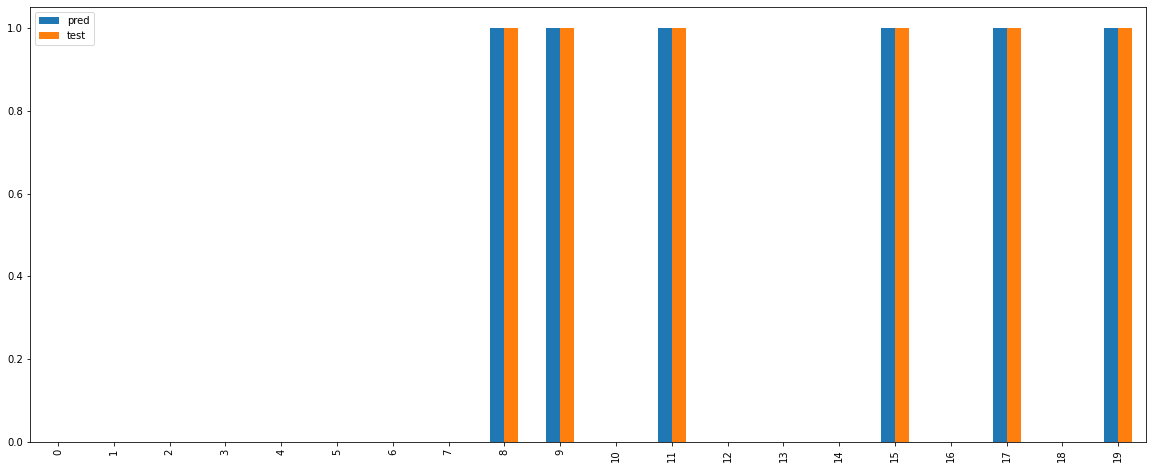

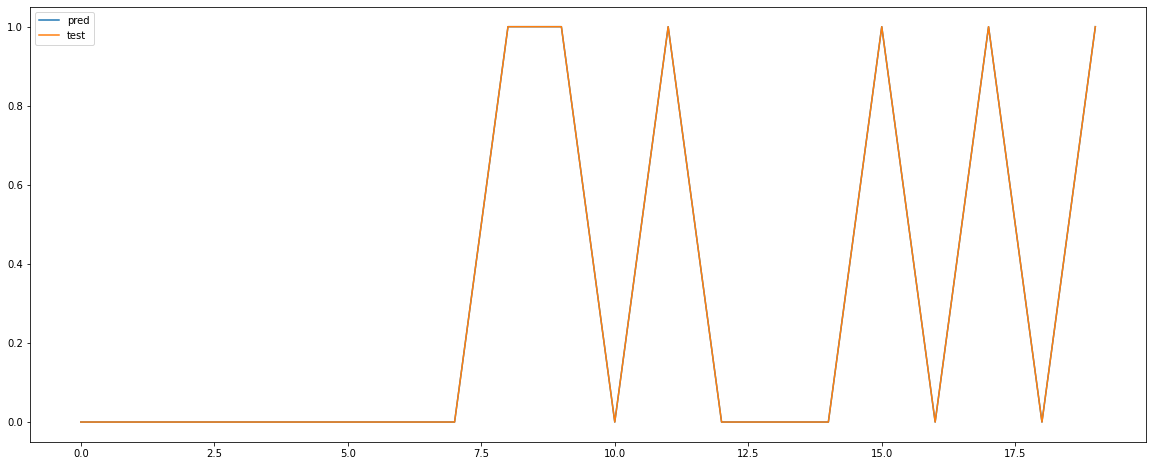

In [ ]:
df1=pd.DataFrame({'pred':y_pred[0:20],'test':y_test[0:20]})
df1.plot(figsize=(20,8),kind='bar')
df1.plot(figsize=(20,8))